# LoC quanitifcation notebook

Takes previously defined thresholds and applies them across population subsets

In [3]:
import btrack # import tracking software
import napari # image viewer
from skimage import io # image loader and viewer
import os # for filename manipulations
import glob # for more fn operations 
import pandas as pd # module for data org 
import matplotlib.pyplot as plt # module for plotting
import seaborn as sns # module for plotting
import numpy as np # for math operations
import re
from homuncu_loc import dataio
sns.set(font='Nimbus Sans', style = 'white') # my favourite formatting :)
sns.set_palette('PiYG') # my favourite colours :D 

In [41]:
from homuncu_loc import dataio
import pandas as pd
from tqdm.auto import tqdm
import os
import btrack

# Load image information

In [85]:
df = dataio.load_expt_dir()
df

,check ID,ID,expt_type,has_sc_analyses,sc_types,has_tif,has_vsi,has_metadata,image_location,image_fn,...,Plate ID 1,Plate ID 2,Markers,ch0,ch1,ch2,ch3,condition,basename,location
1,112,112,iAT1_iAT2,3,"['_ch1_threshold_quantification.png', '_z_trac...",TRUE,TRUE,TRUE,/run/user/30046150/gvfs/smb-share:server=data2...,20x_21-12-031B_A12456_Multichannel Z-Stack_202...,...,21-12-031B,A12456,DAPI-NKX21-PDPN-ZO1,DAPI,NKX21,PDPN,ZO1,Day7_static,20x_21-12-031B_A12456_Multichannel Z-Stack_202...,
2,113,113,iAT1_iAT2,2,"['_z_tracks_masks.h5', '_ch1_threshold_quantif...",TRUE,TRUE,TRUE,/run/user/30046150/gvfs/smb-share:server=data2...,20x_21-12-031B_A12456_Multichannel Z-Stack_202...,...,21-12-031B,A12456,DAPI-NKX21-PDPN-ZO1,DAPI,NKX21,PDPN,ZO1,Day7_static,20x_21-12-031B_A12456_Multichannel Z-Stack_202...,
3,114,114,iAT1_iAT2,1,['_iat2.h5'],TRUE,TRUE,TRUE,/run/user/30046150/gvfs/smb-share:server=data2...,20x_21-12-031B_A12456_Multichannel Z-Stack_202...,...,,,,,,,,,,
4,121,121,iAT1_iAT2,3,"['_ch2_threshold_quantification.png', '_z_trac...",TRUE,TRUE,TRUE,/run/user/30046150/gvfs/smb-share:server=data2...,20x_21-12-031B_A12456_Multichannel Z-Stack_202...,...,21-12-031B,A12456,DAPI-SPC-PDPN-ZO1,DAPI,SPC,PDPN,ZO1,Day7_static,20x_21-12-031B_A12456_Multichannel Z-Stack_202...,
5,122,122,iAT1_iAT2,3,"['_ch1_threshold_quantification.png', '_z_trac...",TRUE,TRUE,TRUE,/run/user/30046150/gvfs/smb-share:server=data2...,20x_21-12-031B_A12456_Multichannel Z-Stack_202...,...,21-12-031B,A12456,DAPI-SPC-PDPN-ZO1,DAPI,SPC,PDPN,ZO1,Day7_static,20x_21-12-031B_A12456_Multichannel Z-Stack_202...,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,1510,1510,macroph_iAT1_iAT2,5,"['_mphi.h5', '_iat1.h5', '_mphi_sc_measurement...",TRUE,TRUE,TRUE,/run/user/30046150/gvfs/smb-share:server=data2...,20230802_20X_23-03-001A1_DAPI_ZO-1_CD16_Mtb_Mu...,...,23-03-001,,DAPI-ZO1-CD16-MTB,DAPI,ZO1,CD16,MTB,,20230802_20X_23-03-001A1_DAPI_ZO-1_CD16_Mtb_Mu...,smb://data2.thecrick.org/lab-gutierrezm/scratc...
84,1511,1511,macroph_iAT1_iAT2,5,"['_mphi.h5', '_iat2.h5', '_iat1.h5', '_iat_sc_...",TRUE,TRUE,TRUE,/run/user/30046150/gvfs/smb-share:server=data2...,20230802_20X_23-03-001A1_DAPI_ZO-1_CD16_Mtb_Mu...,...,23-03-001,,DAPI-ZO1-CD16-MTB,DAPI,ZO1,CD16,MTB,,20230802_20X_23-03-001A1_DAPI_ZO-1_CD16_Mtb_Mu...,smb://data2.thecrick.org/lab-gutierrezm/scratc...
85,1512,1512,macroph_iAT1_iAT2,5,"['_iat2.h5', '_iat1.h5', '_mphi.h5', '_mphi_sc...",TRUE,TRUE,TRUE,/run/user/30046150/gvfs/smb-share:server=data2...,20230802_20X_23-03-001A1_DAPI_ZO-1_CD16_Mtb_Mu...,...,23-03-001,,DAPI-ZO1-CD16-MTB,DAPI,ZO1,CD16,MTB,,20230802_20X_23-03-001A1_DAPI_ZO-1_CD16_Mtb_Mu...,smb://data2.thecrick.org/lab-gutierrezm/scratc...
86,1513,1513,macroph_iAT1_iAT2,5,"['_mphi.h5', '_iat1.h5', '_iat2.h5', '_mphi_sc...",TRUE,TRUE,TRUE,/run/user/30046150/gvfs/smb-share:server=data2...,20230802_20X_23-03-001A1_DAPI_ZO-1_CD16_Mtb_Mu...,...,23-03-001,,DAPI-ZO1-CD16-MTB,DAPI,ZO1,CD16,MTB,,20230802_20X_23-03-001A1_DAPI_ZO-1_CD16_Mtb_Mu...,smb://data2.thecrick.org/lab-gutierrezm/scratc...


In [69]:
iat12 = """20230801_20X_23-03-011B5_DAPI_NKX2-1_PDPN_ZO-1_Multichannel Z-Stack_20230801_1434
20230801_20X_23-03-011B5_DAPI_NKX2-1_PDPN_ZO-1_Multichannel Z-Stack_20230801_1435
20230801_20X_23-03-011B5_DAPI_NKX2-1_PDPN_ZO-1_Multichannel Z-Stack_20230801_1436
20230801_20X_23-03-011B6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1438
20230801_20X_23-03-011B6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1439
20230801_20X_23-03-011B6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1440
20230801_20X_23-03-002A5_DAPI_NKX201_PDPN_ZO-1_Multichannel Z-Stack_20230801_1441
20230801_20X_23-03-002A5_DAPI_NKX201_PDPN_ZO-1_Multichannel Z-Stack_20230801_1442
20230801_20X_23-03-002A5_DAPI_NKX201_PDPN_ZO-1_Multichannel Z-Stack_20230801_1443
20230801_20X_23-03-002A6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1444
20230801_20X_23-03-002A6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1445
20230801_20X_23-03-002B5_DAPI_NKX2-1_PDPN_ZO-1_Multichannel Z-Stack_20230801_1448
20230801_20X_23-03-002B6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1449
20230801_20X_23-03-002B6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1450
20230801_20X_23-03-002B6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1451
20x_21-12-031B_A12456_Multichannel Z-Stack_20220811_112
20x_21-12-031B_A12456_Multichannel Z-Stack_20220811_113
20x_21-12-031B_A12456_Multichannel Z-Stack_20220811_114
20x_21-12-031B_A12456_Multichannel Z-Stack_20220811_121
20x_21-12-031B_A12456_Multichannel Z-Stack_20220811_122
20x_21-12-031B_A12456_Multichannel Z-Stack_20220811_123
20x_21-12-029A_A3456_Multichannel Z-Stack_20220818_194
20x_21-12-029A_A3456_Multichannel Z-Stack_20220818_195
20x_21-12-029A_A3456_Multichannel Z-Stack_20220818_196
20x_21-12-028A_A23456_Multichannel Z-Stack_20220818_235
20x_21-12-028A_A23456_Multichannel Z-Stack_20220818_236
20x_21-12-028A_A23456_Multichannel Z-Stack_20220818_237
20x_21-12-028A_A23456_Multichannel Z-Stack_20220818_244
20x_21-12-028A_A23456_Multichannel Z-Stack_20220818_245
20x_21-12-028A_A23456_Multichannel Z-Stack_20220818_246
20x_21-12-029B_A12346_Multichannel Z-Stack_20220819_284
20x_21-12-029B_A12346_Multichannel Z-Stack_20220819_286
20x_21-12-029B_A12346_Multichannel Z-Stack_20220819_287"""
fns = iat12.splitlines()

### Filter into three sets

In [54]:
sc_data_paths = {'PDPN': [], 'NKX': [], 'SPC': []}
for fn in tqdm(fns, total=len(fns)):
    matching_rows = df[df['image_fn'] == fn]['image_location']
    if not matching_rows.empty:
        image_dir = matching_rows.iloc[0]
        sc_base_dir = image_dir.replace('images', 'sc_analyses') 
        sc_fn = None
        
        # Check if the specific file exists, and set sc_fn accordingly
        if os.path.exists(os.path.join(sc_base_dir, fn + '_iat2.h5')):
            sc_fn = fn + '_iat2.h5'
        elif os.path.exists(os.path.join(sc_base_dir, fn + '_z_tracks_masks.h5')):
            sc_fn = fn + '_z_tracks_masks.h5'
        else:
            print(f'Single cell data not found for {fn}')
            continue  # Skip to the next iteration of the loop
        
        sc_data_path = os.path.join(sc_base_dir, sc_fn)

        if 'PDPN' in sc_data_path:
            sc_data_paths['PDPN'].append(sc_data_path)
        if 'NKX' in sc_data_path:
            sc_data_paths['NKX'].append(sc_data_path)
        if 'SP-C' in sc_data_path:
            sc_data_paths['SPC'].append(sc_data_path)

  0%|          | 0/33 [00:00<?, ?it/s]

# Load tracks

In [75]:
# Initialize the dictionary to store the tracks
tracks_dict = {}

for channel in tqdm(sc_data_paths.keys(), total = 3, desc = 'iterating over channel'):
    tracks_dict[channel] = {}
    for sc_fn in tqdm(sc_data_paths[channel], total = len(sc_data_paths[channel]), desc = 'iterating over all sc_files in channel', leave = False):
        # Extract the file name without extension
        if 'iat2' in sc_fn: 
            fn = os.path.basename(sc_fn).split('_iat2')[0]
            obj_type = 'obj_type_2'
        if '_z_tracks_masks' in sc_fn: 
            fn = os.path.basename(sc_fn).split('_z_tracks_masks')[0]
            obj_type = 'obj_type_1'
        
        # Find the corresponding row in the DataFrame
        matching_rows = df[df['image_fn'] == fn]
        if not matching_rows.empty:
            # Assuming 'ID' is the column with unique identifiers for each row
            row_id = matching_rows['ID'].values[0]
            
            with btrack.io.HDF5FileHandler(sc_fn, 'r', obj_type=obj_type) as reader:
                tracks = [t for t in reader.tracks if len(t) >= 3]
                
                # Store the tracks in the dictionary
                tracks_dict[channel][row_id] = tracks
        else:
            print(f"File name {fn} not found in DataFrame.")


iterating over channel:   0%|          | 0/3 [00:00<?, ?it/s]

iterating over all sc_files in channel:   0%|          | 0/33 [00:00<?, ?it/s]

[INFO][2023/10/30 05:01:55 PM] Opening HDF file: /run/user/30046150/gvfs/smb-share:server=data2.thecrick.org,share=lab-gutierrezm/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_NKX21_PDPN_ZO1/sc_analyses/20230801_20X_23-03-011B5_DAPI_NKX2-1_PDPN_ZO-1_Multichannel Z-Stack_20230801_1434_iat2.h5...
[INFO][2023/10/30 05:01:55 PM] Loading tracks/obj_type_2
[INFO][2023/10/30 05:01:55 PM] Loading LBEP/obj_type_2
[INFO][2023/10/30 05:01:56 PM] Loading objects/obj_type_2 (52662, 5) (52662 filtered: None)
[INFO][2023/10/30 05:01:56 PM] Closing HDF file: /run/user/30046150/gvfs/smb-share:server=data2.thecrick.org,share=lab-gutierrezm/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_NKX21_PDPN_ZO1/sc_analyses/20230801_20X_23-03-011B5_DAPI_NKX2-1_PDPN_ZO-1_Multichannel Z-Stack_20230801_1434_iat2.h5
[INFO][2023/10/30 05:01:56 PM] Opening HDF file: /run/user/30046150/gvfs/smb-share:server=data2.thecrick.org,share=lab-gutierrezm/home/shared

iterating over all sc_files in channel:   0%|          | 0/16 [00:00<?, ?it/s]

[INFO][2023/10/30 05:02:32 PM] Opening HDF file: /run/user/30046150/gvfs/smb-share:server=data2.thecrick.org,share=lab-gutierrezm/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_NKX21_PDPN_ZO1/sc_analyses/20230801_20X_23-03-011B5_DAPI_NKX2-1_PDPN_ZO-1_Multichannel Z-Stack_20230801_1434_iat2.h5...
[INFO][2023/10/30 05:02:32 PM] Loading tracks/obj_type_2
[INFO][2023/10/30 05:02:32 PM] Loading LBEP/obj_type_2
[INFO][2023/10/30 05:02:32 PM] Loading objects/obj_type_2 (52662, 5) (52662 filtered: None)
[INFO][2023/10/30 05:02:33 PM] Closing HDF file: /run/user/30046150/gvfs/smb-share:server=data2.thecrick.org,share=lab-gutierrezm/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_NKX21_PDPN_ZO1/sc_analyses/20230801_20X_23-03-011B5_DAPI_NKX2-1_PDPN_ZO-1_Multichannel Z-Stack_20230801_1434_iat2.h5
[INFO][2023/10/30 05:02:33 PM] Opening HDF file: /run/user/30046150/gvfs/smb-share:server=data2.thecrick.org,share=lab-gutierrezm/home/shared

iterating over all sc_files in channel:   0%|          | 0/8 [00:00<?, ?it/s]

[INFO][2023/10/30 05:02:48 PM] Opening HDF file: /run/user/30046150/gvfs/smb-share:server=data2.thecrick.org,share=lab-gutierrezm/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_SPC_PDPN_ZO1/sc_analyses/20230801_20X_23-03-011B6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1438_iat2.h5...
[INFO][2023/10/30 05:02:48 PM] Loading tracks/obj_type_2
[INFO][2023/10/30 05:02:48 PM] Loading LBEP/obj_type_2
[INFO][2023/10/30 05:02:48 PM] Loading objects/obj_type_2 (51277, 5) (51277 filtered: None)
[INFO][2023/10/30 05:02:49 PM] Closing HDF file: /run/user/30046150/gvfs/smb-share:server=data2.thecrick.org,share=lab-gutierrezm/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_SPC_PDPN_ZO1/sc_analyses/20230801_20X_23-03-011B6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1438_iat2.h5
[INFO][2023/10/30 05:02:49 PM] Opening HDF file: /run/user/30046150/gvfs/smb-share:server=data2.thecrick.org,share=lab-gutierrezm/home/shared/Lung on

# Quantify according to condition

In [84]:
condition = 'Day7_static'

In [93]:
channel

'SPC'

In [102]:
IDs_to_plot = df[(df['condition'] == condition)
    & (df['ch1'] == channel)]['ID'].values

In [103]:
IDs_to_plot

array(['121', '122', '123'], dtype=object)

In [104]:
for ID in IDs_to_plot:
    tracks = tracks_dict[channel][ID]
    break

KeyError: '121'

In [91]:
channel

'SPC'

In [82]:
df[df['ID'] == row_id]['ch1threshold']

67    1000
Name: ch1threshold, dtype: object

In [77]:
tracks_dict[channel][row_id][0]

,ID,t,x,y,z,parent,root,state,generation,dummy,class_id,mean_intensity,mtb_area,orientation,axis_minor_length,eccentricity,axis_major_length,mtb_status,area
0,3074,16,818.862915,16.561848,0.0,3074,3074,5,0,False,12.0,"(4,) array",183.0,1.466150,39.150875,0.501574,45.255135,1.0,1342.0
1,3074,17,818.676025,16.742966,0.0,3074,3074,5,0,False,28.0,"(4,) array",195.0,1.484519,38.703121,0.512629,45.076477,1.0,1315.0
2,3074,18,818.714966,16.726372,0.0,3074,3074,5,0,False,29.0,"(4,) array",208.0,1.476890,38.510456,0.526573,45.299492,1.0,1312.0
3,3074,19,818.608337,16.536364,0.0,3074,3074,5,0,False,12.0,"(4,) array",227.0,1.476132,38.861645,0.502727,44.955601,1.0,1320.0
4,3074,20,818.632324,16.526155,0.0,3074,3074,5,0,False,15.0,"(4,) array",240.0,1.444794,38.751656,0.514868,45.203590,1.0,1319.0
5,3074,21,818.851501,16.678787,0.0,3074,3074,5,0,False,38.0,"(4,) array",281.0,1.489938,38.813396,0.508802,45.085522,1.0,1320.0
6,3074,22,818.728394,16.775417,0.0,3074,3074,5,0,False,35.0,"(4,) array",306.0,1.501991,38.813675,0.507492,45.045414,1.0,1318.0
7,3074,23,818.920837,17.036953,0.0,3074,3074,5,0,False,15.0,"(4,) array",338.0,1.501236,39.474075,0.459679,44.448532,1.0,1326.0
8,3074,24,818.937378,17.027481,0.0,3074,3074,5,0,False,10.0,"(4,) array",355.0,1.452434,39.177559,0.452269,43.926861,1.0,1310.0
9,3074,25,819.296082,17.297686,0.0,3074,3074,5,0,False,26.0,"(4,) array",341.0,1.431563,38.415825,0.427669,42.498417,1.0,1253.0


In [120]:
n_positive = len([t for t in tracks if np.max(t.properties['mean_intensity'][:,channel]) >= threshold])
n_negative = len([t for t in tracks if np.max(t.properties['mean_intensity'][:,channel]) < threshold])
percentage = n_positive / (n_positive+n_negative) *100
sc_intensities = [np.max(t.properties['mean_intensity'][:,channel]) for t in tracks]


## Quantify

Quantification of number of different cell types according to manually set thresholds

#### Print number of positive and negative cells

In [121]:
# channel = 1
n_positive = len([t for t in tracks if np.max(t.properties['mean_intensity'][:,channel]) >= threshold])
n_negative = len([t for t in tracks if np.max(t.properties['mean_intensity'][:,channel]) < threshold])
print(f'Number of channel {channel} positive cells: {n_positive}')
print(f'Number of channel {channel} negative cells: {n_negative}')
percentage = n_positive / (n_positive+n_negative) *100
print(f'Percentage of positive cells: {percentage:.2f}%')


Number of channel 2 positive cells: 506
Number of channel 2 negative cells: 4065
Percentage of positive cells: 11.07%


#### Plot the number of cells either side of the threshold

/home/dayn/miniconda3/envs/cellpose/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/cellpose/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


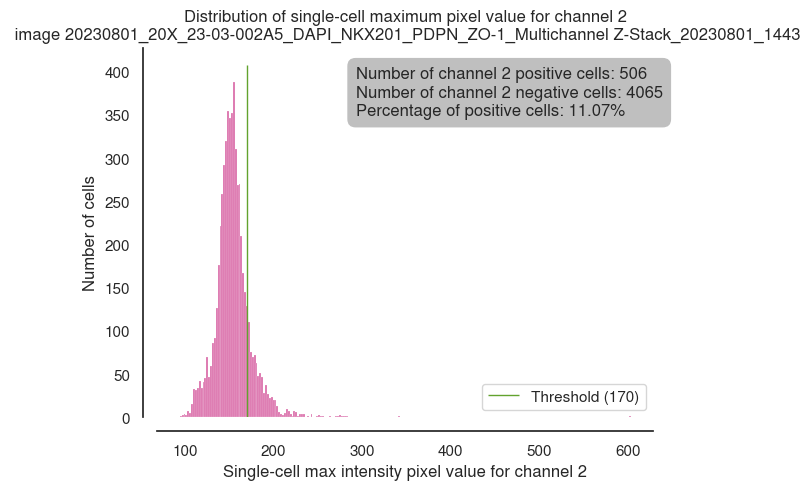

In [122]:
# sc_intensities = [np.max(t.properties['mean_intensity'][:,channel]) for t in tracks]
ax = sns.histplot(sc_intensities)
plt.vlines(x=threshold,
           ymax=ax.get_ylim()[-1],
           ymin=ax.get_ylim()[0],
           color=sns.color_palette('PiYG')[-1],  # my favorite colors :D
           linewidth=1)
sns.despine(offset = 10)
plt.xlabel(f'Single-cell max intensity pixel value for channel {channel}')
plt.ylabel('Number of cells')
plt.legend([f'Threshold ({threshold})'], loc='lower right')
ax.text(0.4, 0.95, 
        f'Number of channel {channel} positive cells: {n_positive}\nNumber of channel {channel} negative cells: {n_negative}\nPercentage of positive cells: {percentage:.2f}%',
        transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', facecolor='grey', edgecolor='none', alpha=0.5))

image_name = os.path.basename(image_fn).replace('.tif','')
plt.title(f'Distribution of single-cell maximum pixel value for channel {channel}\n image {image_name}')
output_fn = os.path.join(sc_base_dir, f'{image_name}_ch{channel}_threshold_quantification.png')
# plt.xlim(0,5000)
plt.savefig(output_fn, bbox_inches = 'tight', dpi = 314)

# Save out as df/excel

In [ ]:
### define parameters to plot in table
cols = ['Cell ID', f'Max. int. {channels(0).name}', f'Max. int. {channels(1).name}', f'Max. int. {channels(2).name}', f'Max. int. {channels(3).name}', 'Average X', 'Average Y']
### extract some intial measurements
df = pd.DataFrame([(track.ID, np.nanmax(track['mean_intensity-0']),np.nanmax(track['mean_intensity-1']),np.nanmax(track['mean_intensity-2']),np.nanmax(track['mean_intensity-3']), np.mean(track.x), np.mean(track.y)) for track in tracks], columns= cols)